# Datatran

## Overview

Conjunto de dados com informações sobre acidentes de trânsito no Brasil, disponibilizado pela Polícia Rodoviária Federal. O dataset contém informações sobre acidentes, veículos, pessoas, condições atmosféricas, dentre outras.

## Dicionario dos dados

![image.png](image/dados1.png)
![image.png](image/dados2.png)

In [11]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
ROOT = Path.cwd()
DATA = ROOT / 'data'

In [58]:
datatran = pd.read_csv(DATA/'datatran2023.csv', encoding='latin1', sep=';')


In [14]:
datatran.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,2,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,2,1,3,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,2,0,3,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,1,2,3,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [15]:
datatran.isna().sum()

id                         0
data_inversa               0
dia_semana                 0
horario                    0
uf                         0
br                         0
km                         0
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     1
fase_dia                   0
sentido_via                0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
regional                  17
delegacia                 32
uop                       46
dtype: int64

['domingo' 'segunda-feira' 'terça-feira' 'quarta-feira' 'quinta-feira'
 'sexta-feira' 'sábado']


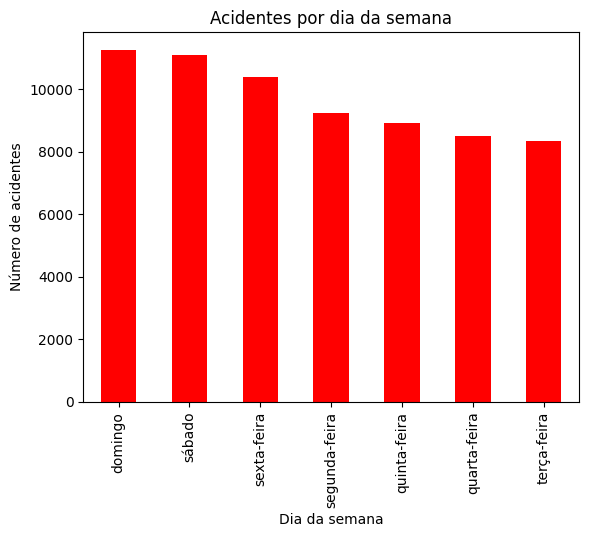

In [60]:
print(datatran['dia_semana'].unique())

datatran['dia_semana'] = datatran['dia_semana'].str.strip()

acidentes_dia_semana = datatran['dia_semana'].value_counts()

acidentes_dia_semana.plot(kind='bar', color='red')
plt.title('Acidentes por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de acidentes')
plt.show()

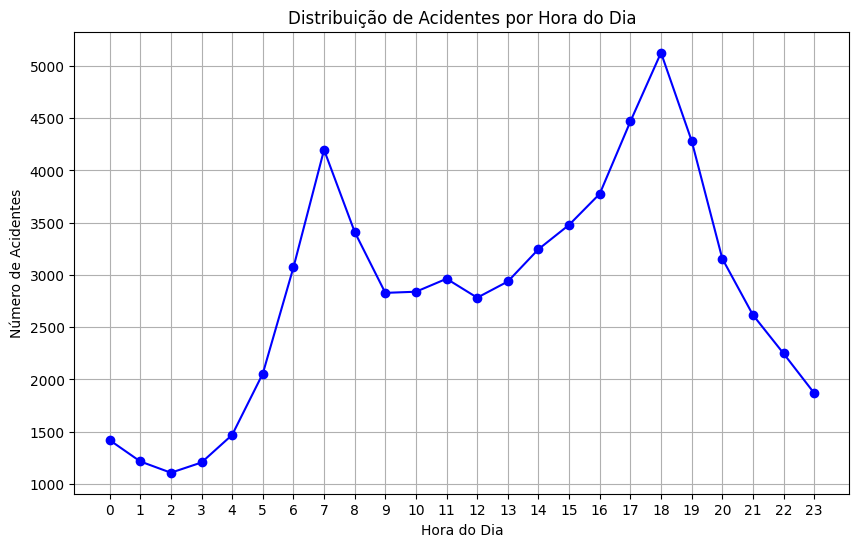

hora
0     1419
1     1215
2     1107
3     1205
4     1469
5     2055
6     3071
7     4197
8     3411
9     2828
10    2839
11    2963
12    2782
13    2937
14    3246
15    3479
16    3776
17    4468
18    5126
19    4283
20    3156
21    2617
22    2248
23    1869
Name: count, dtype: int64


In [61]:
datatran['horario'] = datatran['horario'].str.strip()

datatran['horario'] = pd.to_datetime(datatran['horario'], format='%H:%M:%S', errors='coerce')

datatran['hora'] = datatran['horario'].dt.hour

acidentes_por_hora = datatran['hora'].value_counts().sort_index()

acidentes_por_hora.plot(kind='line', marker='o', color='blue', figsize=(10, 6))
plt.title('Distribuição de Acidentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(0, 24))  
plt.grid(True)
plt.show()

print(acidentes_por_hora)


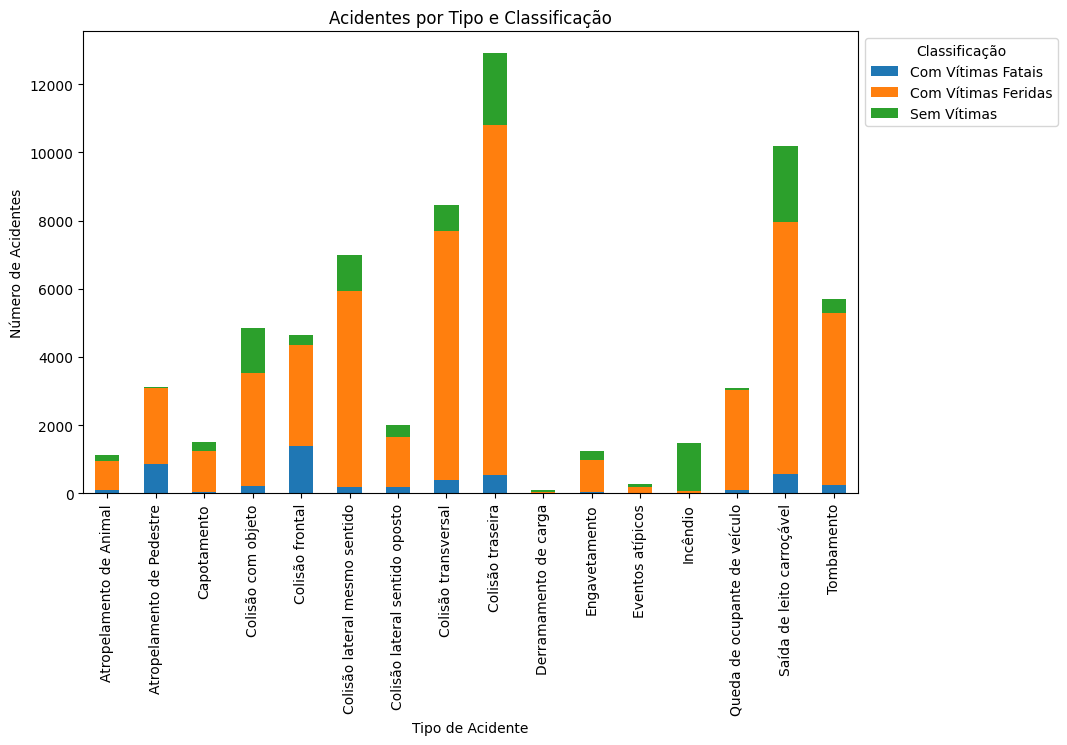

In [62]:
tipo_gravidade = datatran.groupby(
    [
        'tipo_acidente', 'classificacao_acidente'
    ]
).size().unstack(fill_value=0)

tipo_gravidade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Acidentes por Tipo e Classificação')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.legend(title='Classificação', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

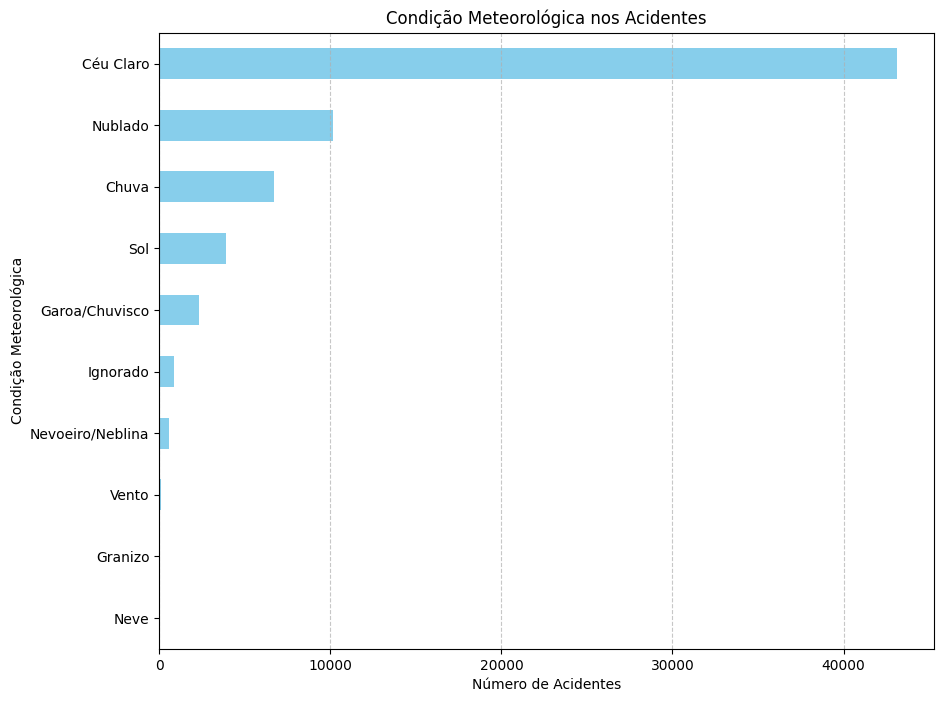

In [63]:
condicao_meterologica = datatran['condicao_metereologica'].value_counts()

condicao_meterologica.sort_values().plot(
    kind='barh', 
    figsize=(10, 8), 
    color='skyblue'
)

plt.title('Condição Meteorológica nos Acidentes')
plt.xlabel('Número de Acidentes')
plt.ylabel('Condição Meteorológica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



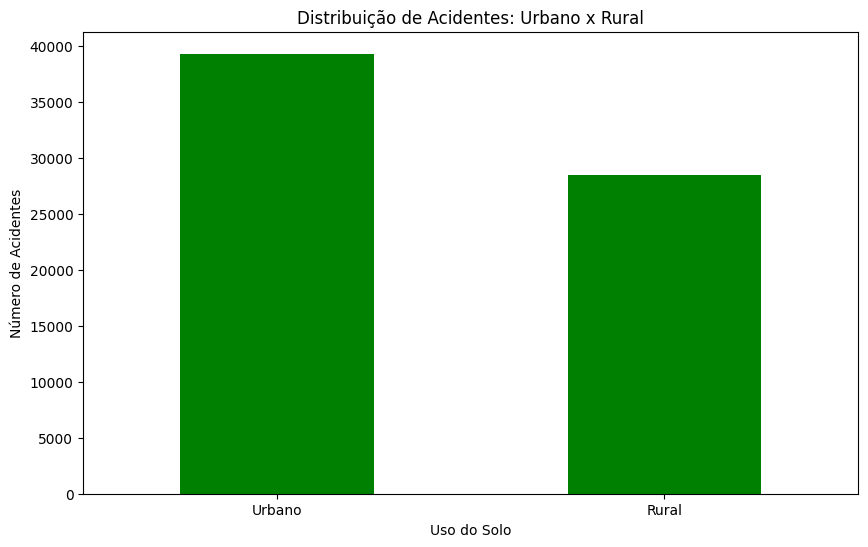

In [64]:
uso_solo = datatran['uso_solo'].value_counts()

uso_solo.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Distribuição de Acidentes: Urbano x Rural')

plt.xlabel('Uso do Solo')
plt.ylabel('Número de Acidentes')
plt.xticks([0, 1], ['Urbano', 'Rural'], rotation=0)
plt.show()

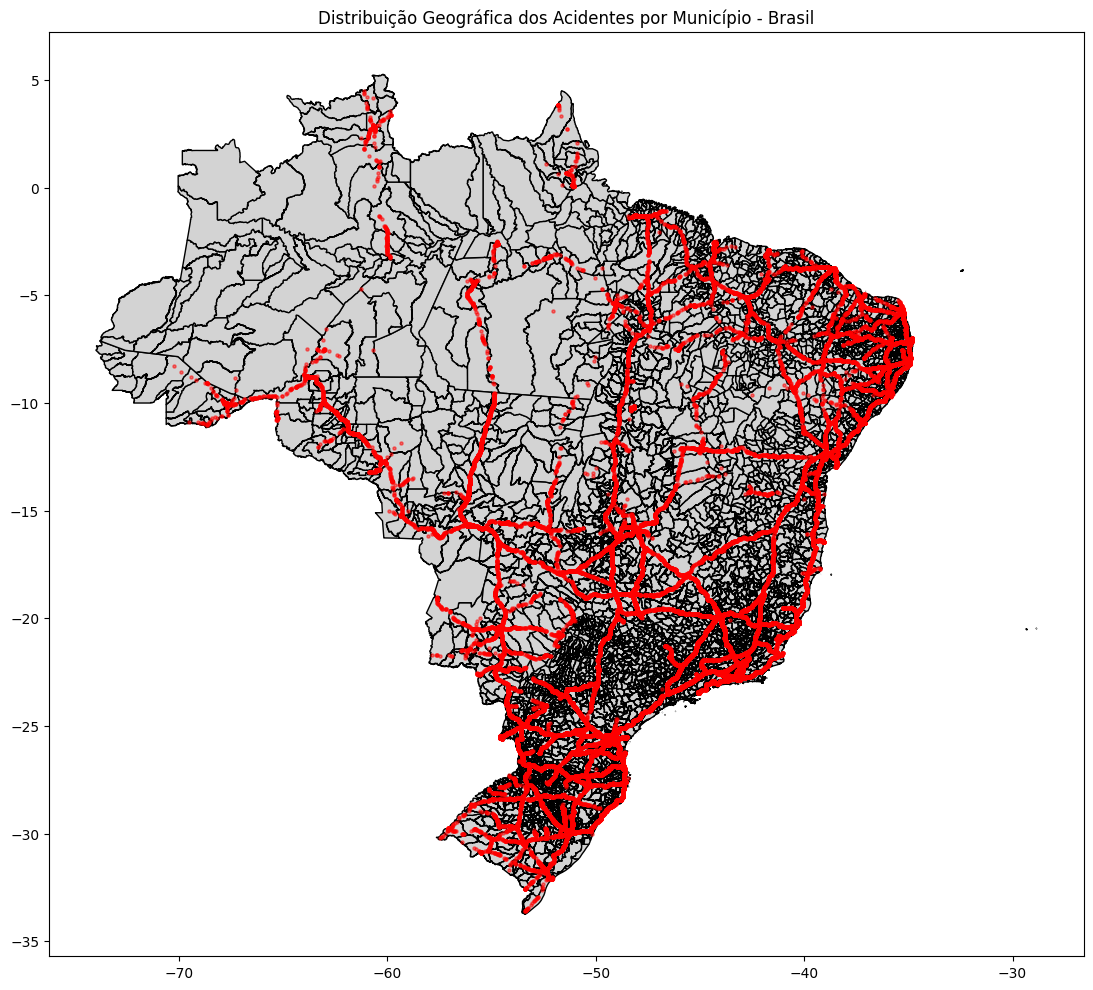

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt

datatran['longitude'] = datatran['longitude'].str.replace(',', '.').astype(float)
datatran['latitude'] = datatran['latitude'].str.replace(',', '.').astype(float)

municipios = gpd.read_file("BR_Municipios_2022.shp")

if municipios.crs is None:
    municipios = municipios.set_crs("EPSG:4674") 

if municipios.crs != "EPSG:4326":
    municipios = municipios.to_crs("EPSG:4326")

acidentes_gdf = gpd.GeoDataFrame(
    datatran,
    geometry=gpd.points_from_xy(datatran['longitude'], datatran['latitude']),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(figsize=(15, 12))
municipios.plot(ax=ax, color="lightgray", edgecolor="black")
acidentes_gdf.plot(ax=ax, color="red", markersize=5, alpha=0.5)

plt.title('Distribuição Geográfica dos Acidentes por Município - Brasil')
plt.show()


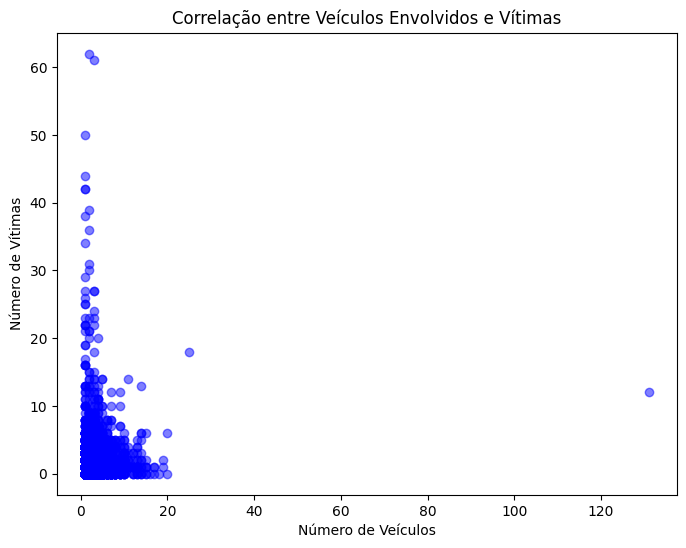

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(datatran['veiculos'], datatran['feridos'], alpha=0.5, c='blue')
plt.title('Correlação entre Veículos Envolvidos e Vítimas')
plt.xlabel('Número de Veículos')
plt.ylabel('Número de Vítimas')
plt.show()


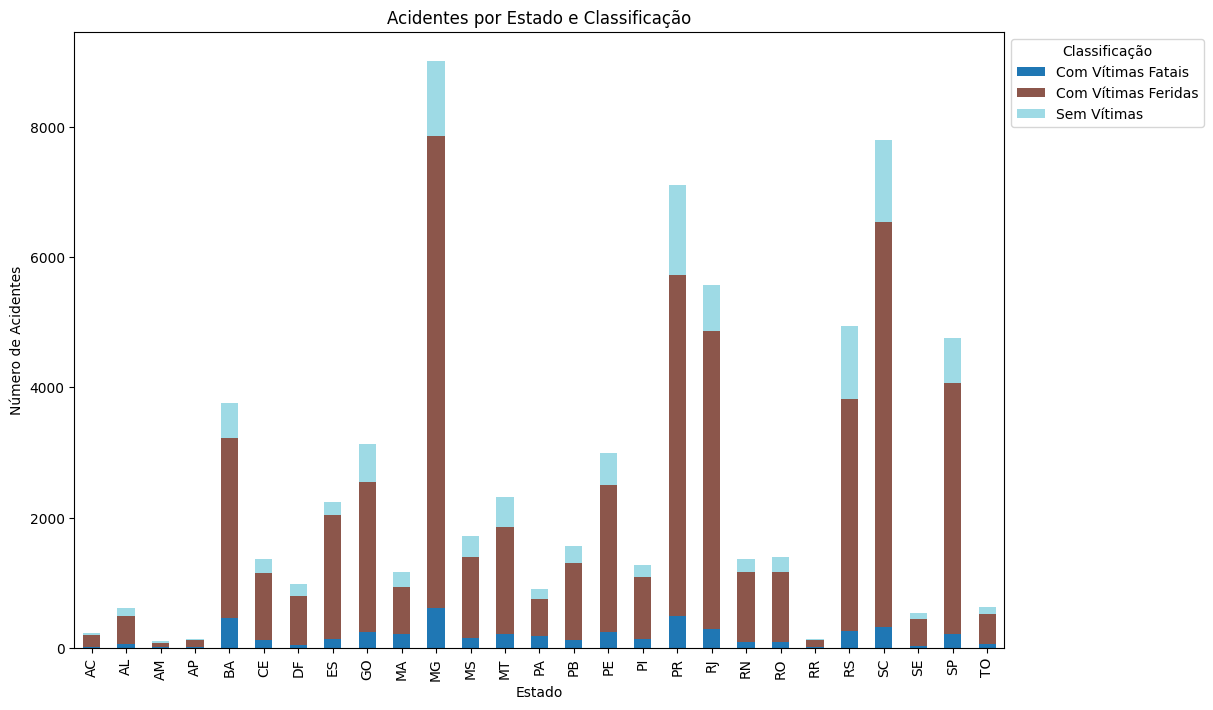

In [67]:
grupo_empilhado = datatran.groupby(
    [
        'uf', 'classificacao_acidente'
    ]
).size().unstack(fill_value=0)

grupo_empilhado.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab20'
)

plt.title('Acidentes por Estado e Classificação')
plt.xlabel('Estado')
plt.ylabel('Número de Acidentes')
plt.legend(title='Classificação', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

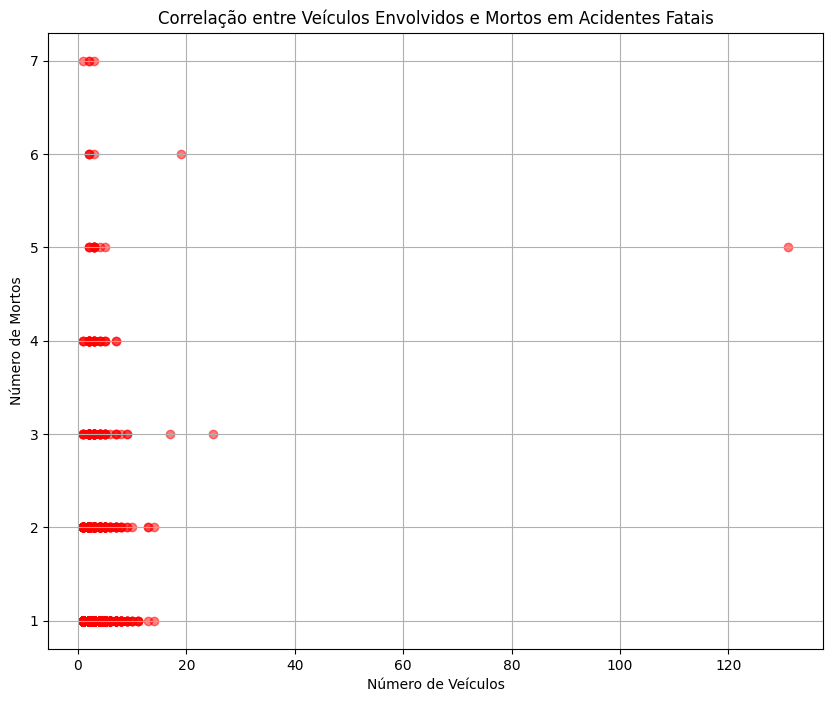

In [68]:
acidentes_fatais = datatran[datatran['classificacao_acidente'] == 'Com Vítimas Fatais']

plt.figure(figsize=(10, 8))

plt.scatter(
    acidentes_fatais['veiculos'],
    acidentes_fatais['mortos'],
    alpha=0.5,
    c='red'
)

plt.title('Correlação entre Veículos Envolvidos e Mortos em Acidentes Fatais')
plt.xlabel('Número de Veículos')
plt.ylabel('Número de Mortos')
plt.grid(True)
plt.show()

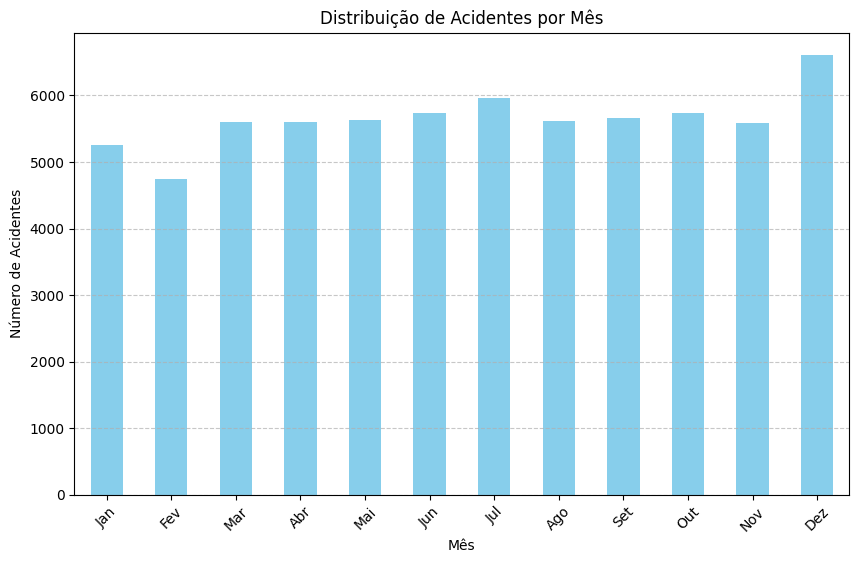

In [70]:
datatran['data_inversa'] = pd.to_datetime(datatran['data_inversa'], errors='coerce')

datatran = datatran[datatran['data_inversa'].notna()]

datatran['mes'] = datatran['data_inversa'].dt.month
datatran['trimestre'] = datatran['data_inversa'].dt.to_period('Q')

acidentes_por_mes = datatran.groupby('mes').size()

acidentes_por_mes = acidentes_por_mes.reindex(range(1, 13), fill_value=0)

acidentes_por_mes.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribuição de Acidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(
    ticks=range(12), 
    labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], 
    rotation=45
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

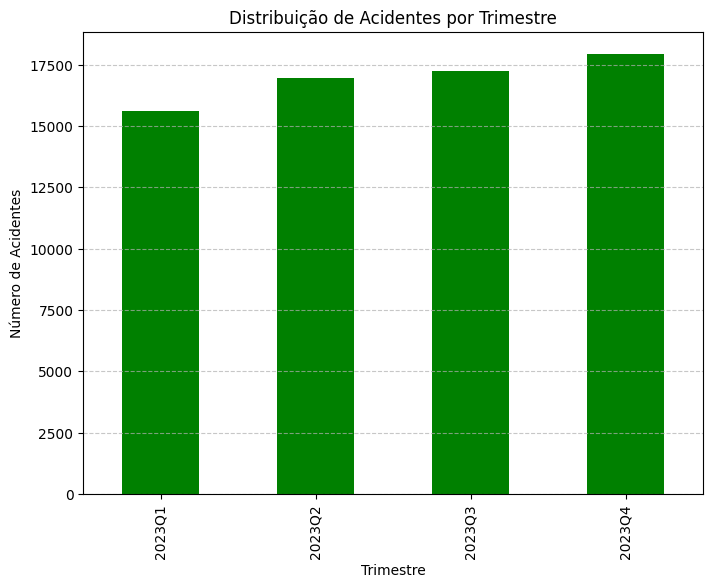

In [71]:
acidentes_por_trimestre = datatran.groupby('trimestre').size()

acidentes_por_trimestre.plot(kind='bar', color='green', figsize=(8, 6))
plt.title('Distribuição de Acidentes por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Número de Acidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

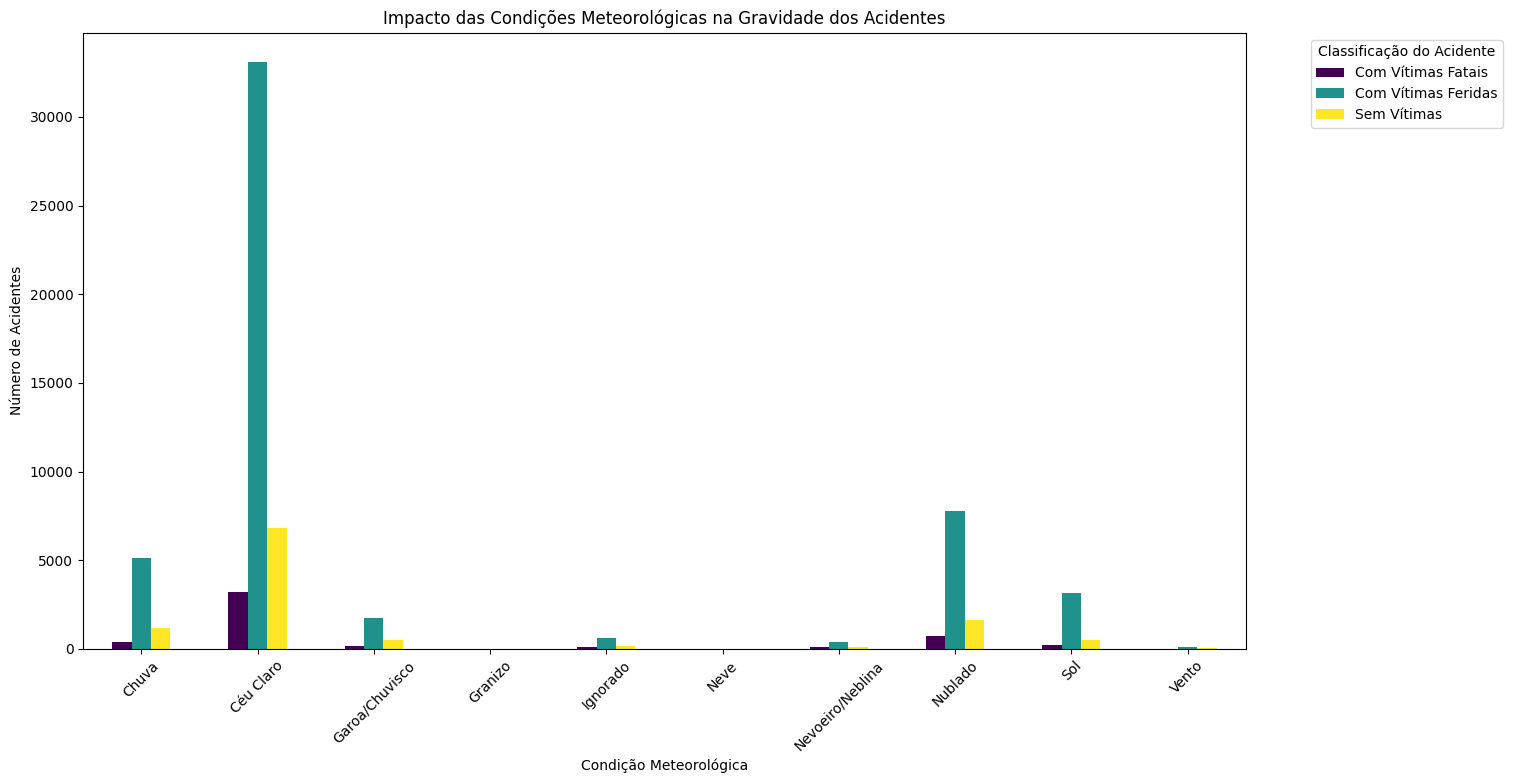

In [72]:
cond_gravidade = datatran.groupby(['condicao_metereologica', 'classificacao_acidente']).size().unstack(fill_value=0)

cond_gravidade.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Impacto das Condições Meteorológicas na Gravidade dos Acidentes')
plt.xlabel('Condição Meteorológica')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.legend(title='Classificação do Acidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

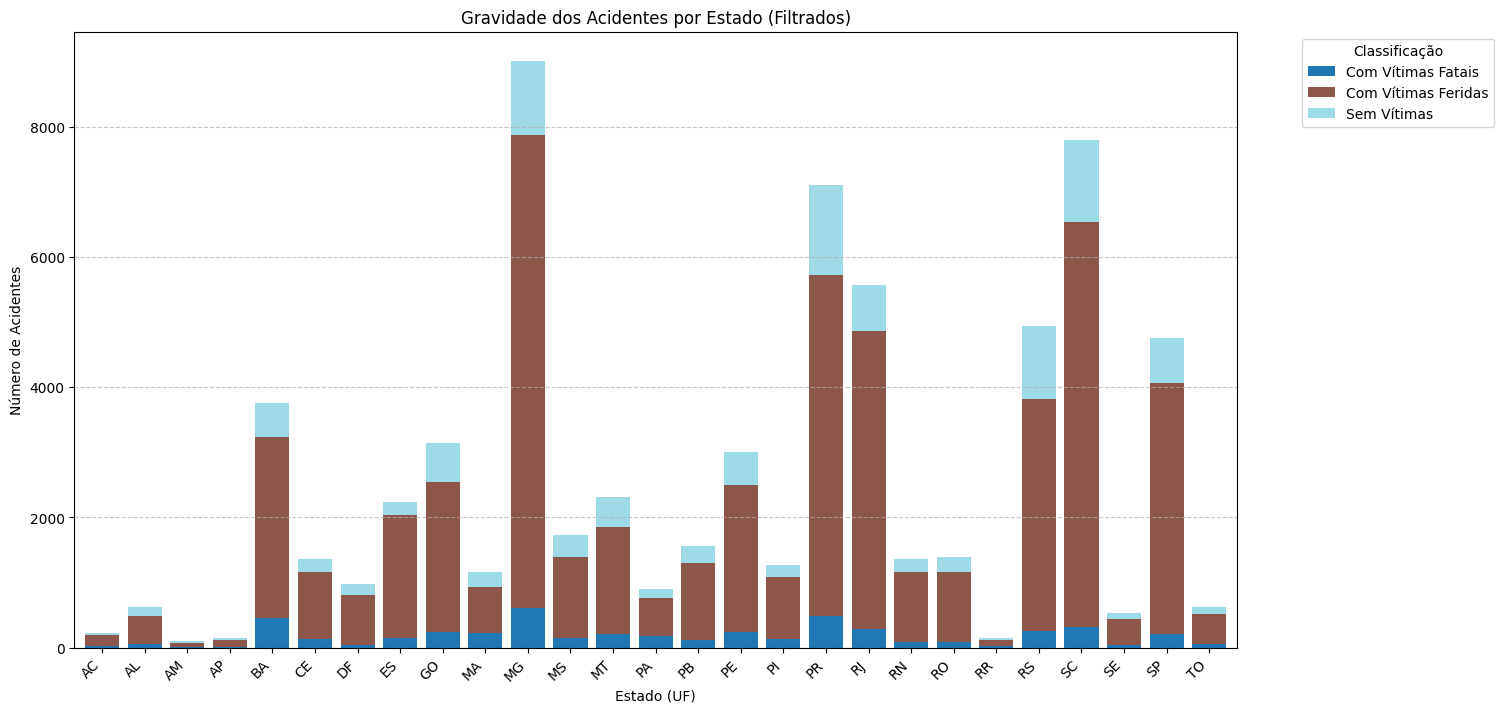

In [74]:
grupo = datatran.groupby(['uf', 'classificacao_acidente']).size().unstack(fill_value=0)

grupo_filtrado = grupo.loc[grupo.sum(axis=1) > 100]  

ax = grupo_filtrado.plot(
    kind='bar', 
    stacked=True, 
    figsize=(15, 8), 
    colormap='tab20',
    width=0.8  
)

plt.title('Gravidade dos Acidentes por Estado (Filtrados)')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Acidentes')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.legend(title='Classificação', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


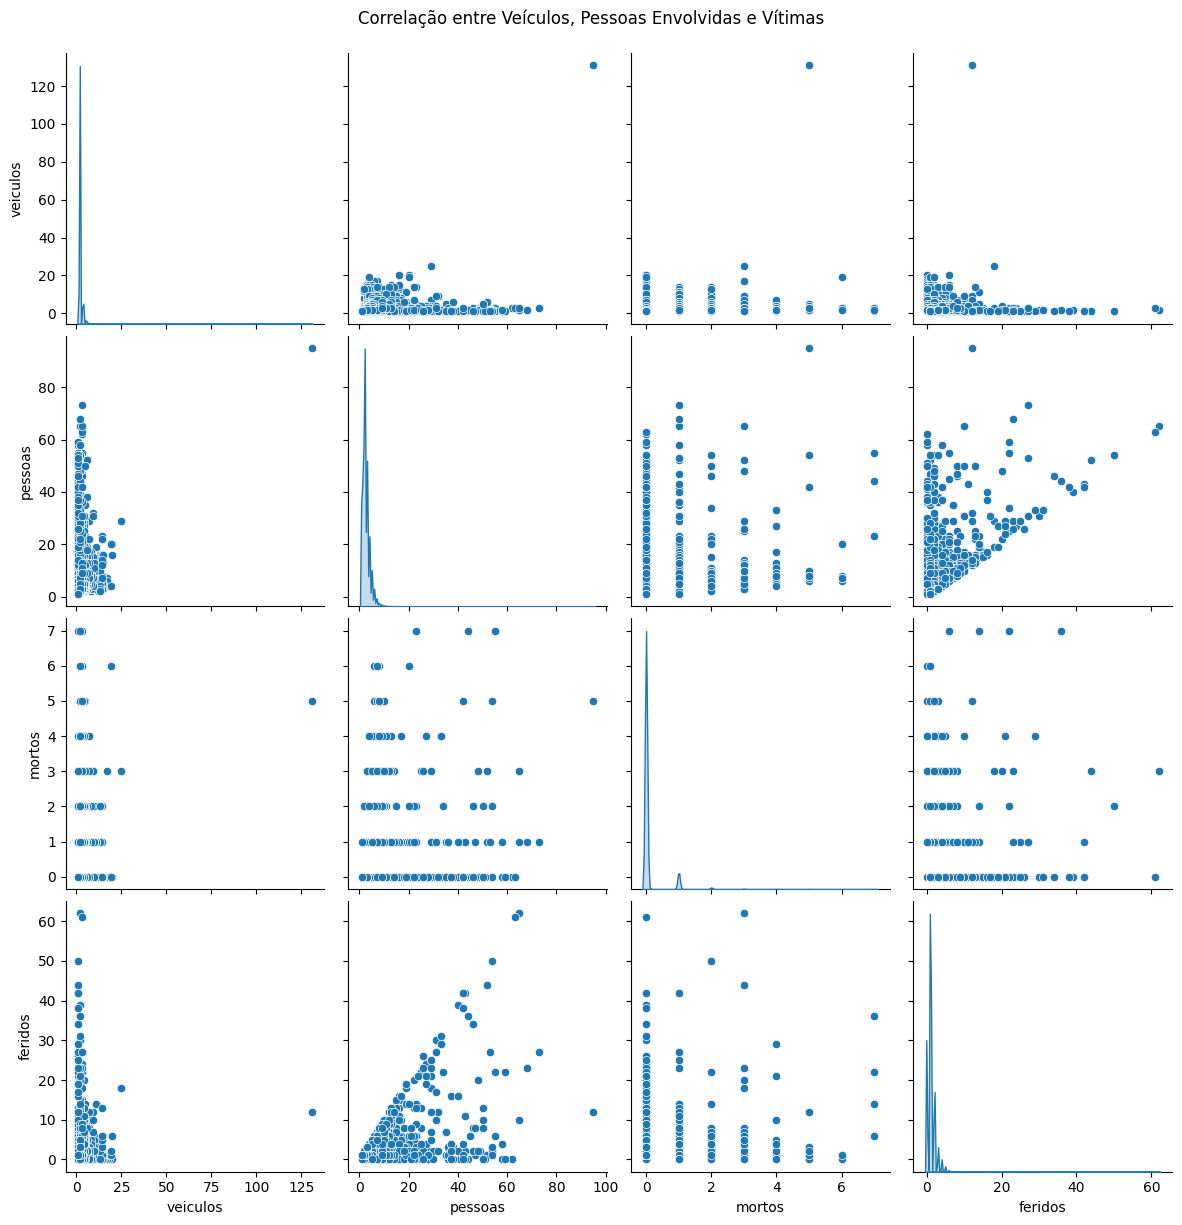

In [77]:
import seaborn as sns

df = datatran[['veiculos', 'pessoas', 'mortos', 'feridos']].copy()

sns.pairplot(df, height=3, diag_kind='kde')
plt.suptitle('Correlação entre Veículos, Pessoas Envolvidas e Vítimas', y=1.02)
plt.show()

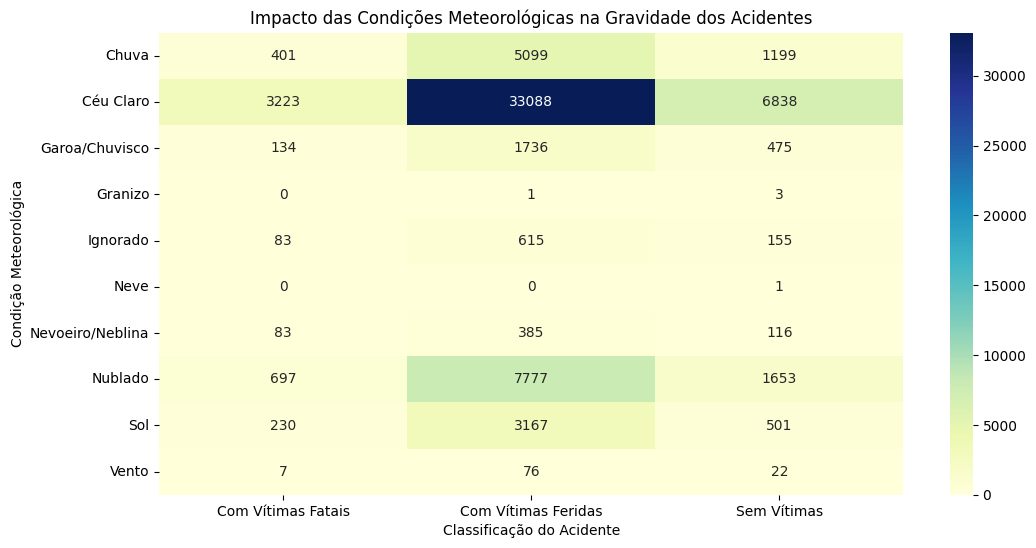

In [78]:
cond_gravidade = datatran.groupby(['condicao_metereologica', 'classificacao_acidente']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(cond_gravidade, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Impacto das Condições Meteorológicas na Gravidade dos Acidentes')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Condição Meteorológica')
plt.show()

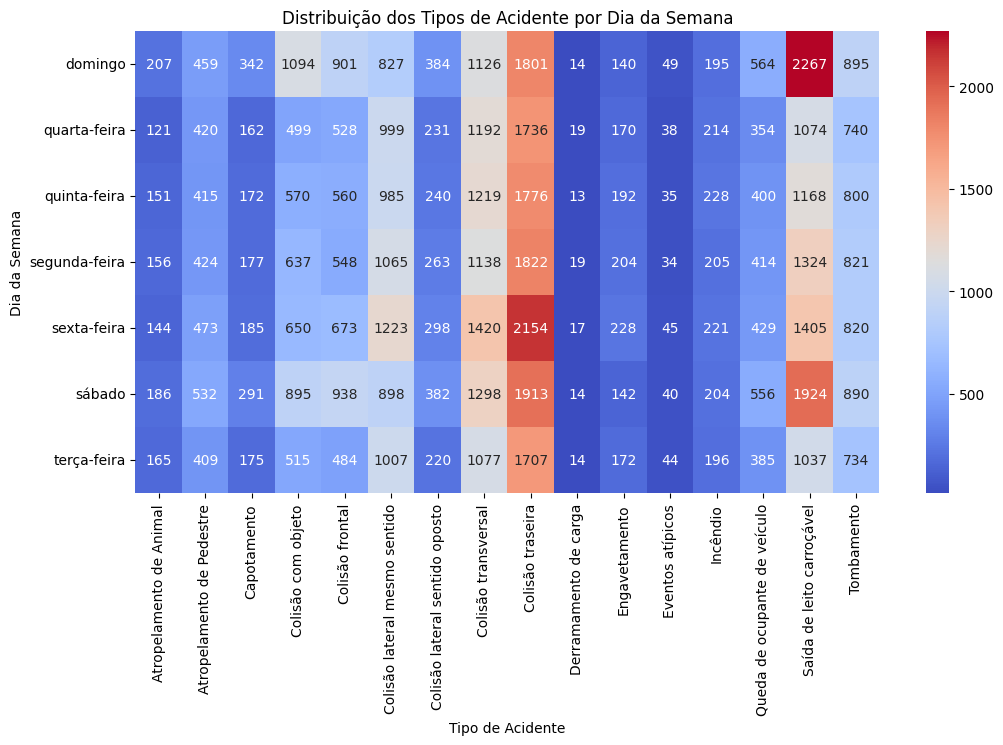

In [79]:
dia_tipo = datatran.groupby(['dia_semana', 'tipo_acidente']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(dia_tipo, annot=True, cmap='coolwarm', fmt='d')

plt.title('Distribuição dos Tipos de Acidente por Dia da Semana')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Dia da Semana')
plt.show()

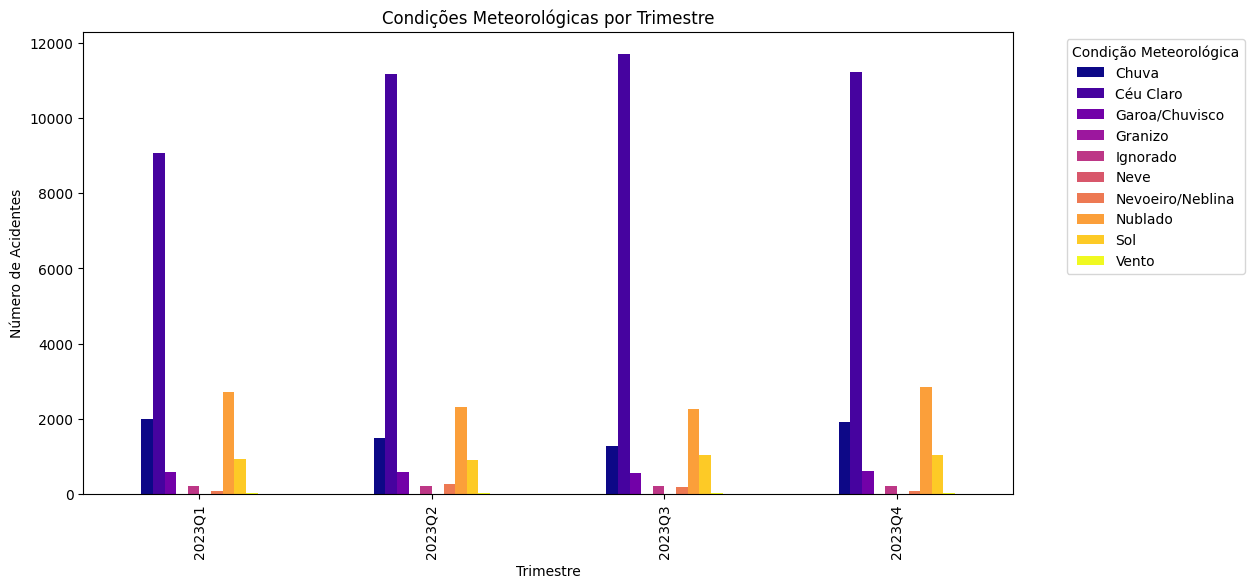

In [80]:
trimestre_condicao = datatran.groupby(['trimestre', 'condicao_metereologica']).size().unstack(fill_value=0)

trimestre_condicao.plot(
    kind='bar', 
    figsize=(12, 6), 
    colormap='plasma'
)

plt.title('Condições Meteorológicas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Número de Acidentes')
plt.legend(title='Condição Meteorológica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()